10. We now use boosting to predict Salary in the Hitters data set.

(a) Remove the observations for whom the salary information is unknown, and then log-transform the salaries.

In [12]:
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS
import sklearn.model_selection as skm
import numpy as np
import matplotlib.pyplot as plt

In [13]:
data = load_data('Hitters')

In [14]:
data

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [15]:
data = data.dropna()
data = data.reset_index(drop=True)
model = MS(data)
data = model.fit_transform(data)

In [23]:
data["Salary"] = data["Salary"].apply(lambda x: np.log(x))

(b) Create a training set consisting of the first 200 observations, and
a test set consisting of the remaining observations.

In [24]:
train = data[data.index < 200]
print (train.shape)
test = data[data.index >= 200]  
print (test.shape)

(200, 21)
(63, 21)


(c) Perform boosting on the training set with 1,000 trees for a range
of values of the shrinkage parameter λ. Produce a plot with
different shrinkage values on the x-axis and the corresponding
training set MSE on the y-axis.

In [38]:
### boosting ###

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

X_train = train.drop(['Salary'], axis=1)
y_train = train['Salary']
X_test = test.drop(['Salary'], axis=1)
y_test = test['Salary']

_lambda_list = np.arange(0.001, 1, 0.2)
train_error_list = []
train_error_list_exp = []
test_error_list = []
test_error_list_exp = []
for _lambda in _lambda_list:    
    boost = GradientBoostingRegressor(n_estimators=1000, learning_rate =_lambda, random_state=1)
    boost.fit(X_train, y_train)
    y_test_predict = boost.predict(X_test)
    test_error_list.append(mean_squared_error(y_test, y_test_predict))
    test_error_list_exp.append(mean_squared_error(np.exp(y_test), np.exp(y_test_predict)))
    y_train_predict = boost.predict(X_train)
    train_error_list_exp.append(mean_squared_error(np.exp(y_test), np.exp(y_test_predict)))
    train_error_list.append(mean_squared_error(y_train, y_train_predict))



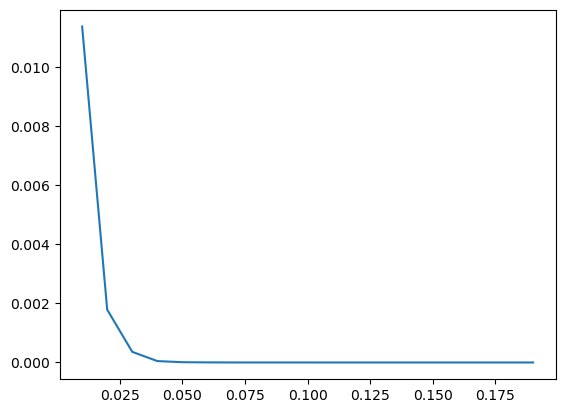

In [34]:
### train error ###
plt.plot(_lambda_list, train_error_list, label='train')
plt.show()

(d) Produce a plot with different shrinkage values on the x-axis and the corresponding test set MSE on the y-axis.

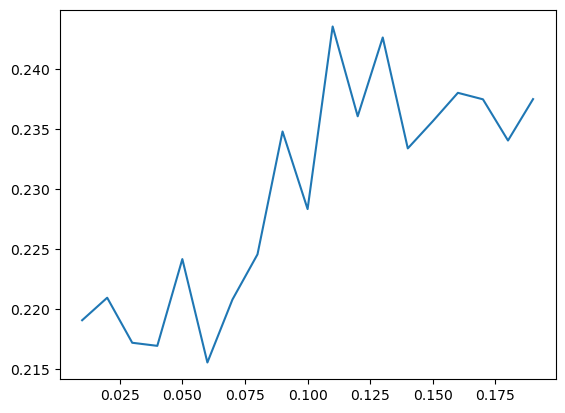

In [35]:
### plot the test error ###
plt.plot(_lambda_list, test_error_list, label='test')
plt.show()


(f) Which variables appear to be the most important predictors in
the boosted model?

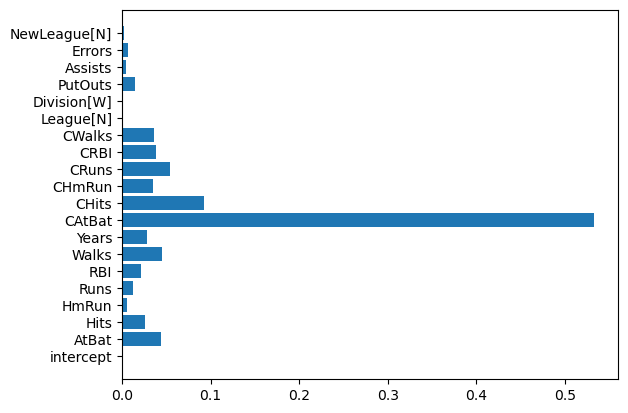

In [36]:
### Summary of the boost model ###
boost = GradientBoostingRegressor(n_estimators=1000, learning_rate = 0.01, random_state=1)
boost.fit(X_train, y_train)
plt.barh(boost.feature_names_in_, boost.feature_importances_)
plt.show()

(g) Now apply bagging to the training set. What is the test set MSE for this approach?

In [37]:
### bagging ###
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
bagging = BaggingRegressor(n_estimators=1000, random_state=1)
bagging.fit(X_train, y_train)
y_test_predict = bagging.predict(X_test)
print ("mean square error", mean_squared_error(y_test, y_test_predict))
### it has a smaller mean square error than boosting ###


mean square error 0.22819565801902605
